# What Colleges are Worth It

Data from the Wall Street Journal

https://www.kaggle.com/wsj/college-salaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Degrees

In [2]:
dpb = pd.read_csv('degrees-that-pay-back.csv')

In [3]:
dpb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [4]:
dpb.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [5]:
dpb.columns = ['major', 'start_50', 'mid_50', 'percent_change',
               'mid_10', 'mid_25', 'mid_75', 'mid_90']

In [6]:
dpb.head()

,major,start_50,mid_50,percent_change,mid_10,mid_25,mid_75,mid_90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [7]:
cols = ['start_50', 'mid_50', 'percent_change', 'mid_10', 'mid_25', 'mid_75', 'mid_90']
dpb[cols] = dpb[cols].replace('[\$,)]','',regex=True).astype(float)

In [8]:
dpb.head()

,major,start_50,mid_50,percent_change,mid_10,mid_25,mid_75,mid_90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [9]:
dpb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
major             50 non-null object
start_50          50 non-null float64
mid_50            50 non-null float64
percent_change    50 non-null float64
mid_10            50 non-null float64
mid_25            50 non-null float64
mid_75            50 non-null float64
mid_90            50 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.2+ KB


In [10]:
dpb.sort_values(by='start_50', ascending=False).head()

,major,start_50,mid_50,percent_change,mid_10,mid_25,mid_75,mid_90
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0


In [11]:
dpb.sort_values(by='mid_50', ascending=False).head()

,major,start_50,mid_50,percent_change,mid_10,mid_25,mid_75,mid_90
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0


In [12]:
dpb.sort_values(by='percent_change', ascending=False).head()

,major,start_50,mid_50,percent_change,mid_10,mid_25,mid_75,mid_90
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


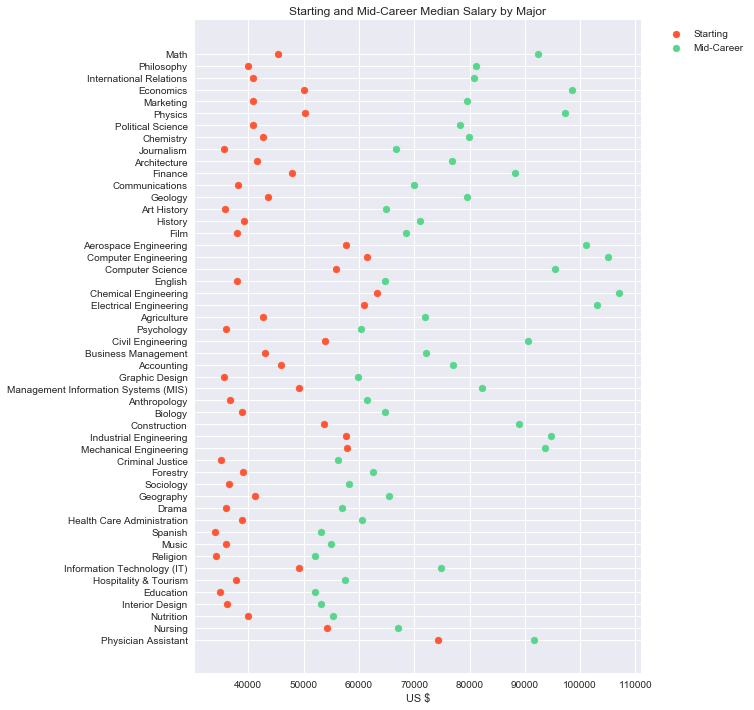

In [13]:
pld = dpb.sort_values(by='percent_change', ascending=False).reset_index()

fig = plt.figure(figsize=(8,12))

y = len(pld.index) - pld.index + 1
labels = pld['major']

plt.yticks(y, labels)

x1 = pld['start_50']
plt.scatter(x1, y, color='#FF5733', label='Starting')
x2 = pld['mid_50']
plt.scatter(x2, y, color='#58D68D', label='Mid-Career')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting and Mid-Career Median Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))

plt.show()

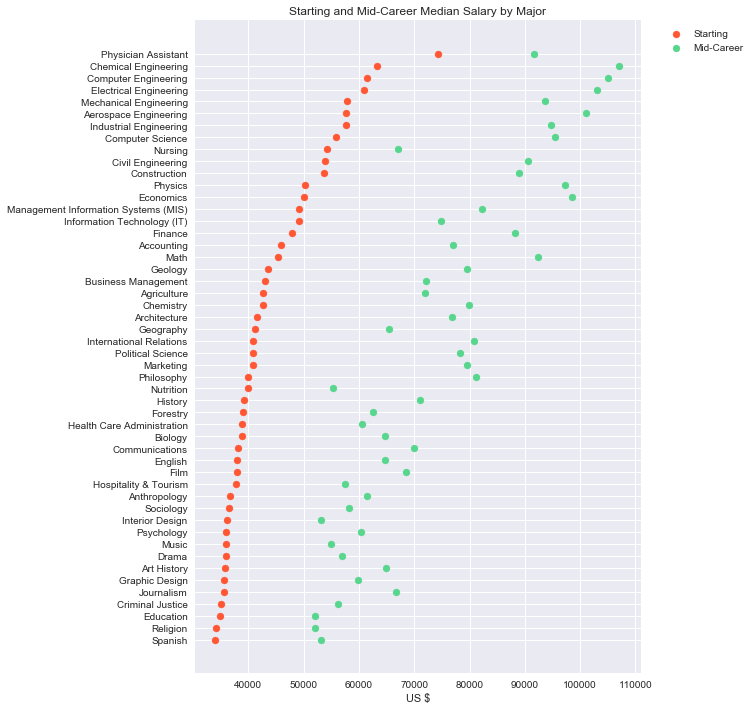

In [14]:
pld = dpb.sort_values(by='start_50', ascending=False).reset_index()

fig = plt.figure(figsize=(8,12))

y = len(pld.index) - pld.index + 1
labels = pld['major']

plt.yticks(y, labels)

x1 = pld['start_50']
plt.scatter(x1, y, color='#FF5733', label='Starting')
x2 = pld['mid_50']
plt.scatter(x2, y, color='#58D68D', label='Mid-Career')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting and Mid-Career Median Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))

plt.show()

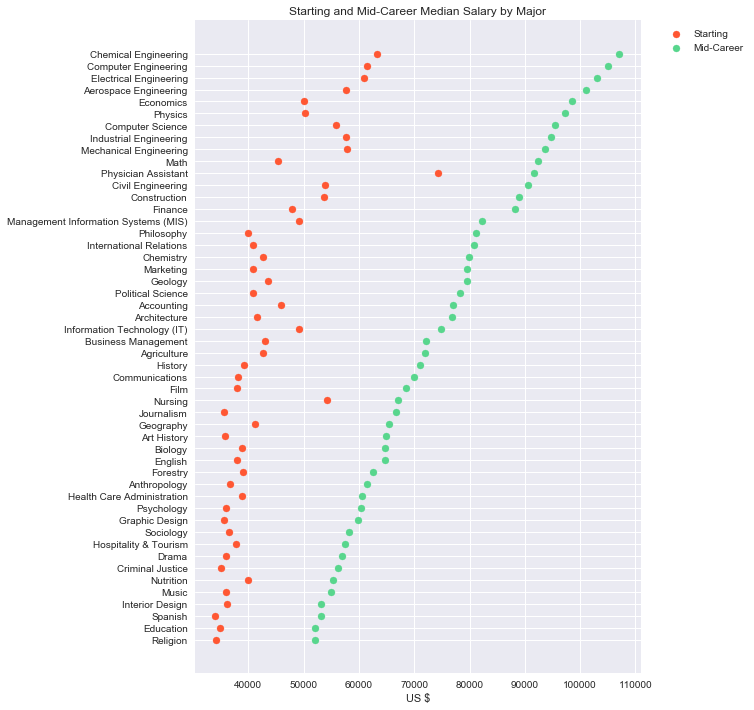

In [15]:
pld = dpb.sort_values(by='mid_50', ascending=False).reset_index()

fig = plt.figure(figsize=(8,12))

y = len(pld.index) - pld.index + 1
labels = pld['major']

plt.yticks(y, labels)

x1 = pld['start_50']
plt.scatter(x1, y, color='#FF5733', label='Starting')
x2 = pld['mid_50']
plt.scatter(x2, y, color='#58D68D', label='Mid-Career')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting and Mid-Career Median Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))

plt.show()

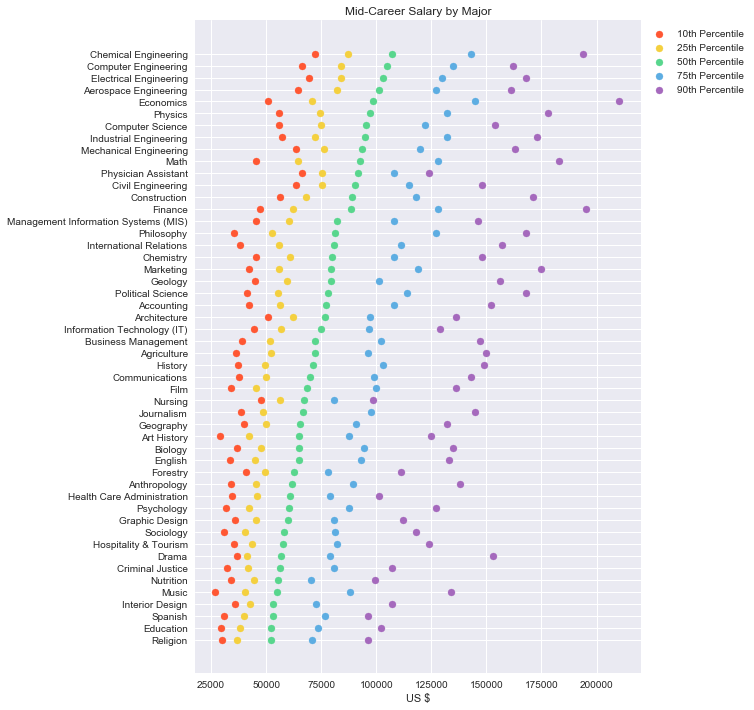

In [16]:
pld = dpb.sort_values(by='mid_50', ascending=False).reset_index()

fig = plt.figure(figsize=(8,12))

y = len(pld.index) - pld.index + 1
labels = pld['major']

plt.yticks(y, labels)

x1 = pld['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = pld['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = pld['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = pld['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = pld['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))

plt.show()

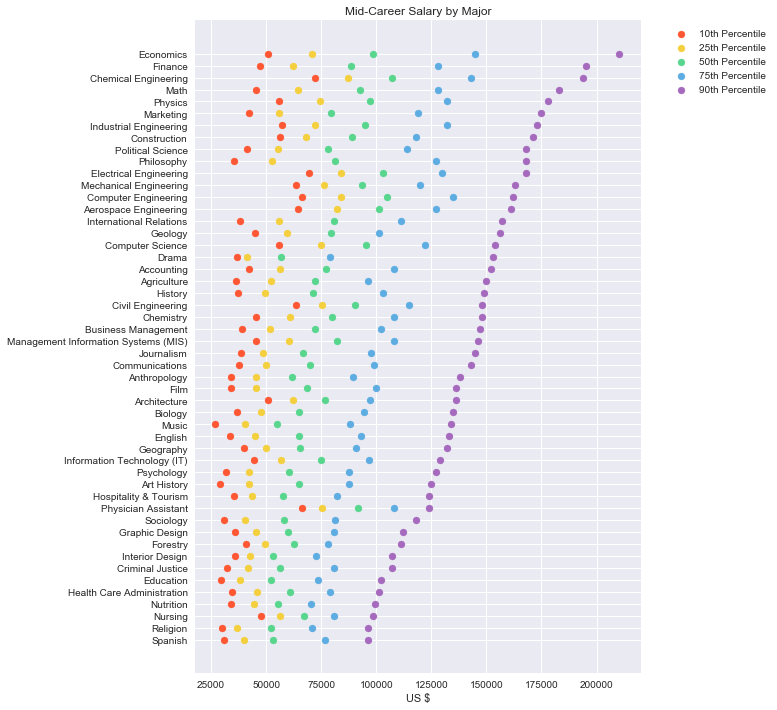

In [17]:
pld = dpb.sort_values(by='mid_90', ascending=False).reset_index()

fig = plt.figure(figsize=(8,12))

y = len(pld.index) - pld.index + 1
labels = pld['major']

plt.yticks(y, labels)

x1 = pld['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = pld['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = pld['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = pld['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = pld['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()

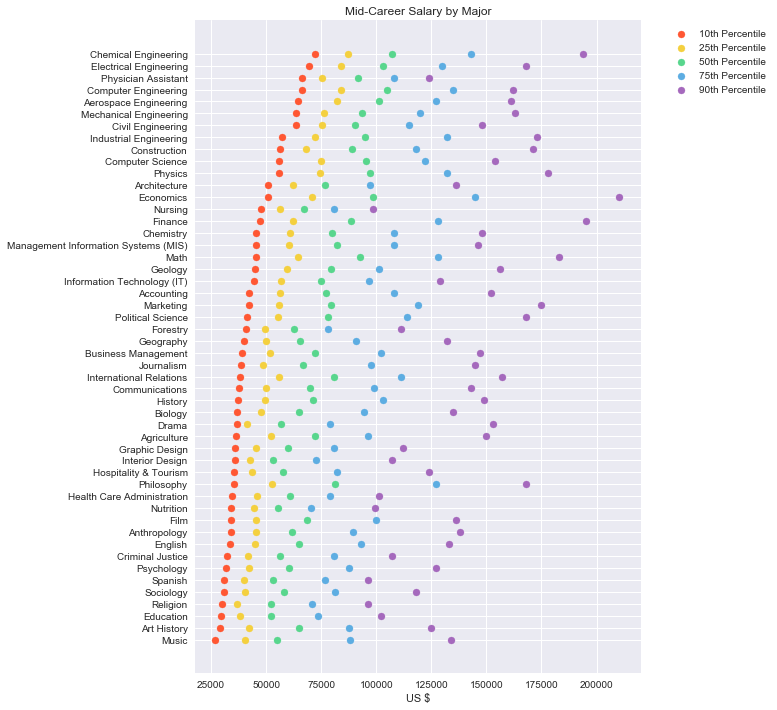

In [18]:
pld = dpb.sort_values(by='mid_10', ascending=False).reset_index()

fig = plt.figure(figsize=(8,12))

y = len(pld.index) - pld.index + 1
labels = pld['major']

plt.yticks(y, labels)

x1 = pld['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = pld['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = pld['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = pld['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = pld['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()

# Schools

In [19]:
sbc = pd.read_csv('salaries-by-college-type.csv')
sbr = pd.read_csv('salaries-by-region.csv')

In [20]:
sbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB


In [21]:
sbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


In [22]:
sbc.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [23]:
sbr.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


### Merge School Data

In [24]:
schools = pd.merge(sbc, sbr,
                   on=['School Name','Starting Median Salary','Mid-Career Median Salary',
                       'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
                       'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary'],
                   how='outer')
schools.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern


In [25]:
schools.columns = ['name', 'typ', 'start_50', 'mid_50', 'mid_10', 'mid_25', 'mid_75', 'mid_90','region']
schools = schools[['name','typ','region','start_50','mid_50','mid_10','mid_25','mid_75','mid_90']]
schools.head()

,name,typ,region,start_50,mid_50,mid_10,mid_25,mid_75,mid_90
0,Massachusetts Institute of Technology (MIT),Engineering,Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,Northeastern,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [26]:
schools.typ.unique()

array(['Engineering', 'Party', 'State', 'Liberal Arts', 'Ivy League', nan], dtype=object)

In [27]:
schools.region.unique()

array(['Northeastern', 'California', 'Southern', 'Western', 'Midwestern',
       nan], dtype=object)

In [28]:
cols = ['start_50', 'mid_50', 'mid_10', 'mid_25', 'mid_75', 'mid_90']
schools[cols] = schools[cols].replace('[\$,)]','',regex=True).astype(float)
schools.head()

,name,typ,region,start_50,mid_50,mid_10,mid_25,mid_75,mid_90
0,Massachusetts Institute of Technology (MIT),Engineering,Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,Northeastern,62200.0,114000.0,NaN,80200.0,142000.0,NaN


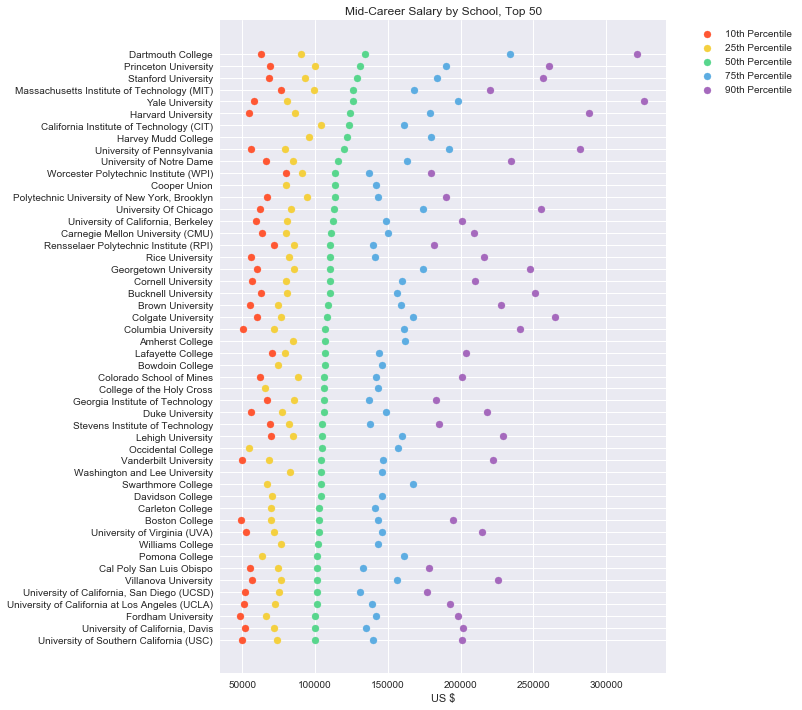

In [29]:
ds = schools.sort_values(by='mid_50', ascending=False).reset_index().head(50)

fig = plt.figure(figsize=(8,12))

y = len(ds.index) - ds.index + 1
labels = ds['name']

plt.yticks(y, labels)

x1 = ds['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = ds['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = ds['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = ds['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = ds['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by School, Top 50')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()

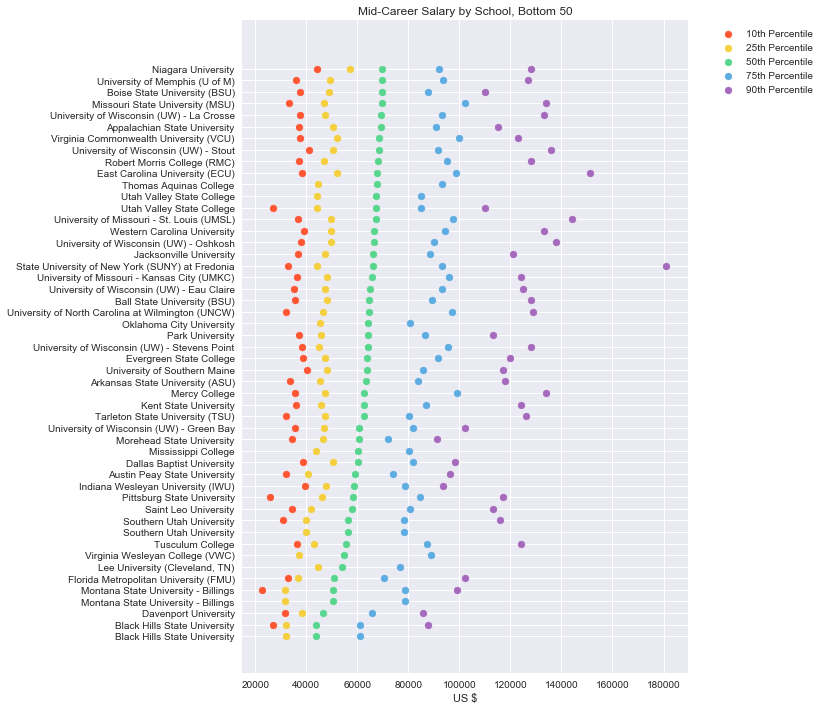

In [30]:
ds = schools.sort_values(by='mid_50', ascending=False).reset_index().tail(50)

fig = plt.figure(figsize=(8,12))

y = len(ds.index) - ds.index + 1
labels = ds['name']

plt.yticks(y, labels)

x1 = ds['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = ds['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = ds['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = ds['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = ds['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by School, Bottom 50')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()

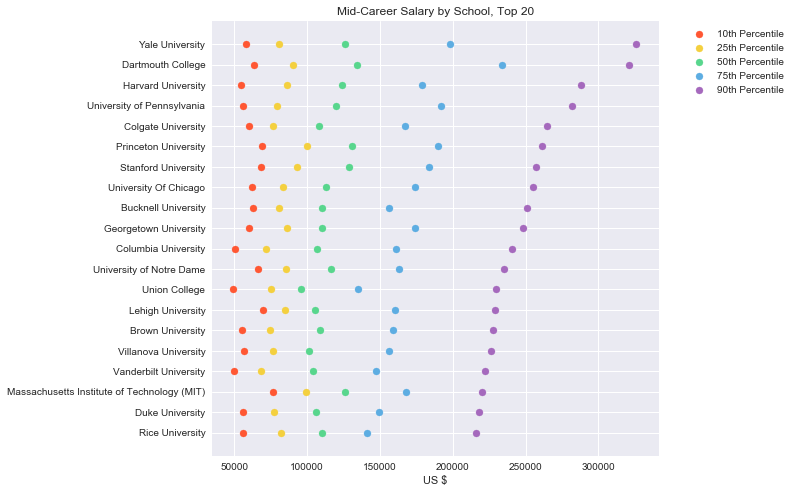

In [31]:
ds = schools.sort_values(by='mid_90', ascending=False).reset_index().head(20)

fig = plt.figure(figsize=(8,8))

y = len(ds.index) - ds.index + 1
labels = ds['name']

plt.yticks(y, labels)

x1 = ds['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = ds['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = ds['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = ds['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = ds['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by School, Top 20')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()

In [32]:
schools.groupby('typ').size()

typ
Engineering      19
Ivy League        8
Liberal Arts     47
Party            20
State           175
dtype: int64

In [33]:
schools.groupby('region').size()

region
California       29
Midwestern       75
Northeastern    103
Southern         90
Western          43
dtype: int64

In [34]:
schools.groupby('typ').aggregate(np.mean).sort_values(by='start_50',ascending=False)

,start_50,mid_50,mid_10,mid_25,mid_75,mid_90
typ,,,,,,
Ivy League,60475.000000,120125.000000,57900.000000,82787.500000,184125.000000,269625.000000
Engineering,59057.894737,103842.105263,61793.333333,81384.210526,134868.421053,173333.333333
Liberal Arts,45746.808511,89378.723404,47478.571429,61936.170213,131076.595745,191142.857143
Party,45715.000000,84685.000000,44052.631579,60005.000000,118100.000000,166947.368421
State,44126.285714,78567.428571,41886.285714,56689.714286,106970.857143,147571.428571


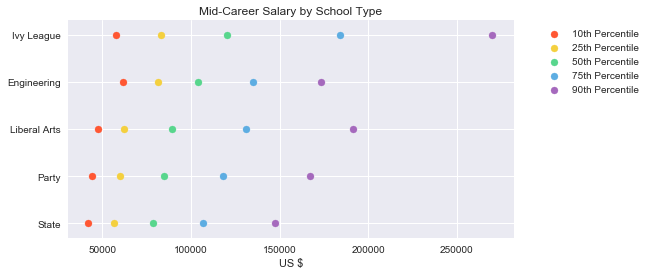

In [35]:
types = schools.groupby('typ').aggregate(np.mean).sort_values(by='start_50',ascending=False).reset_index()

fig = plt.figure(figsize=(8,4))

y = len(types.index) - types.index + 1
labels = types['typ']

plt.yticks(y, labels)

x1 = types['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = types['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = types['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = types['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = types['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by School Type')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()

In [36]:
schools.groupby('region').aggregate(np.mean).sort_values(by='start_50',ascending=False)

,start_50,mid_50,mid_10,mid_25,mid_75,mid_90
region,,,,,,
California,51013.793103,93196.551724,47930.434783,67293.103448,127406.896552,168130.434783
Northeastern,48405.825243,91178.640777,48956.470588,65333.980583,129355.339806,181576.470588
Southern,44570.000000,80021.111111,43119.753086,57627.777778,110481.111111,154303.703704
Western,44483.720930,78337.209302,43031.428571,56676.744186,106211.627907,144371.428571
Midwestern,44348.000000,78509.333333,43067.647059,57228.000000,108162.666667,148825.000000


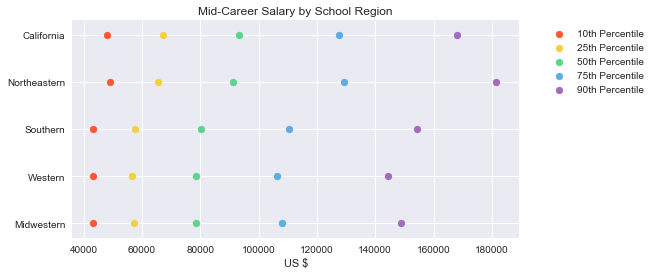

In [37]:
types = schools.groupby('region').aggregate(np.mean).sort_values(by='start_50',ascending=False).reset_index()

fig = plt.figure(figsize=(8,4))

y = len(types.index) - types.index + 1
labels = types['region']

plt.yticks(y, labels)

x1 = types['mid_10']
plt.scatter(x1, y, color='#FF5733', label='10th Percentile')
x2 = types['mid_25']
plt.scatter(x2, y, color='#F4D03F', label='25th Percentile')
x3 = types['mid_50']
plt.scatter(x3, y, color='#58D68D', label='50th Percentile')
x4 = types['mid_75']
plt.scatter(x4, y, color='#5DADE2', label='75th Percentile')
x5 = types['mid_90']
plt.scatter(x5, y, color='#A569BD', label='90th Percentile')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Mid-Career Salary by School Region')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

plt.show()